In [44]:
# ANN with tensorflow and keras
# Usecase - Multiclass classifier

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\Sandeep\\OneDrive\\Desktop\\Classes and Files\\Iris.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['iris'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
Le = LabelEncoder()
y_le = Le.fit_transform(y)

In [18]:
y_label = tf.keras.utils.to_categorical(y_le)

In [21]:
stdsc1 = StandardScaler()
X_scaled = stdsc1.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, train_size = 0.8, random_state =123)

In [32]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (120, 4)
y_train (120, 3)
X_test (30, 4)
y_test (30, 3)


In [33]:
model = tf.keras.models.Sequential()

# hidden layer 1 | units = nodes in hidden layer | input shape = nodes in input layer/no. of features 

model.add(tf.keras.layers.Dense(units = 10, activation = 'relu', input_shape = (4,) ))

# hidden layer 2

model.add(tf.keras.layers.Dense(units = 12, activation = 'relu' ))

# output layer

model.add(tf.keras.layers.Dense(units = 3, activation = 'softmax' ))

In [38]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
model_history = model.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test))

Epoch 1/500
4/4 [==============================] - 0s 51ms/step - loss: 1.2443 - accuracy: 0.1250 - val_loss: 1.1626 - val_accuracy: 0.2000
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 1.2187 - accuracy: 0.1250 - val_loss: 1.1377 - val_accuracy: 0.2000
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1944 - accuracy: 0.1500 - val_loss: 1.1140 - val_accuracy: 0.2000
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1707 - accuracy: 0.1500 - val_loss: 1.0912 - val_accuracy: 0.2333
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1491 - accuracy: 0.1750 - val_loss: 1.0698 - val_accuracy: 0.3000
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1279 - accuracy: 0.2000 - val_loss: 1.0490 - val_accuracy: 0.3000
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1075 - accuracy: 0.2500 - val_loss: 1.0288 - val_accuracy: 0.3333
Epoch 8/500
4/4 [===

In [40]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

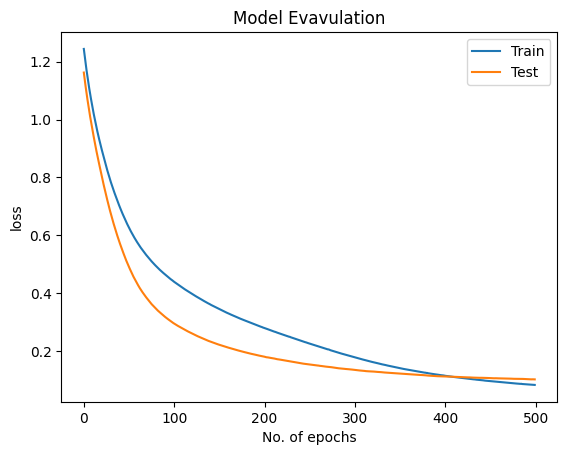

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Evavulation")
plt.xlabel("No. of epochs")
plt.ylabel("loss")
plt.legend(['Train','Test'], loc = 'upper right')

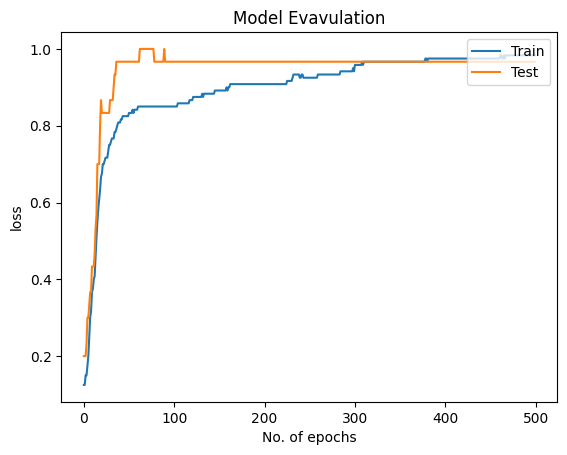

In [43]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Evavulation")
plt.xlabel("No. of epochs")
plt.ylabel("loss")
plt.legend(['Train','Test'], loc = 'upper right')

In [45]:
model.predict(X_scaled)

5/5 [==============================] - 0s 1ms/step


array([[9.98751283e-01, 1.10259443e-03, 1.46077902e-04],
       [9.97534394e-01, 2.25151842e-03, 2.14018073e-04],
       [9.98801112e-01, 1.07016310e-03, 1.28754720e-04],
       [9.98178720e-01, 1.62976631e-03, 1.91523039e-04],
       [9.99074101e-01, 8.08993820e-04, 1.16798568e-04],
       [9.97974217e-01, 1.73684163e-03, 2.88944721e-04],
       [9.98976827e-01, 8.91570409e-04, 1.31583787e-04],
       [9.98384237e-01, 1.43137458e-03, 1.84337521e-04],
       [9.98136282e-01, 1.69921271e-03, 1.64498619e-04],
       [9.98042583e-01, 1.77473691e-03, 1.82642776e-04],
       [9.98588383e-01, 1.23772747e-03, 1.73966488e-04],
       [9.98450398e-01, 1.36354053e-03, 1.86013160e-04],
       [9.98174429e-01, 1.66980072e-03, 1.55715054e-04],
       [9.99371350e-01, 5.63921814e-04, 6.47886627e-05],
       [9.99279916e-01, 6.22489839e-04, 9.75191797e-05],
       [9.99249995e-01, 6.03326072e-04, 1.46628998e-04],
       [9.98999894e-01, 8.61761451e-04, 1.38337811e-04],
       [9.98484790e-01, 1.33582

In [49]:
pred = np.argmax(model.predict(X_scaled), axis = 1)

5/5 [==============================] - 0s 1ms/step


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
print("Consfusion Metrtix")
print(confusion_matrix(y_le, pred))
print(" ")
print("Classification report")
print(classification_report(y_le, pred))

Consfusion Metrtix
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
 
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [54]:
# Test data

In [60]:
y_test1 = np.argmax((y_test), axis = 1)

In [63]:
print("Consfusion Metrtix")
print(confusion_matrix(y_test1, pred_test))
print(" ")
print("Classification report")
print(classification_report(y_test1, pred_test))

Consfusion Metrtix
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
 
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

